### GRIP : The Sparks Foundation

 ### Data Science and Business Analytic Intern
 
 #### Author : Maksuda Rahman Fariya
 
 #### Task 3: ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
  
  #### Importing Python Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns

### Importing DataSet

In [4]:
data = pd.read_csv("SampleSuperstore.csv")

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.shape

(9994, 13)

In [10]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
data.duplicated().sum()

17

In [12]:
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
data = data.drop(columns=['Postal Code'],axis=1)
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Data Visualization

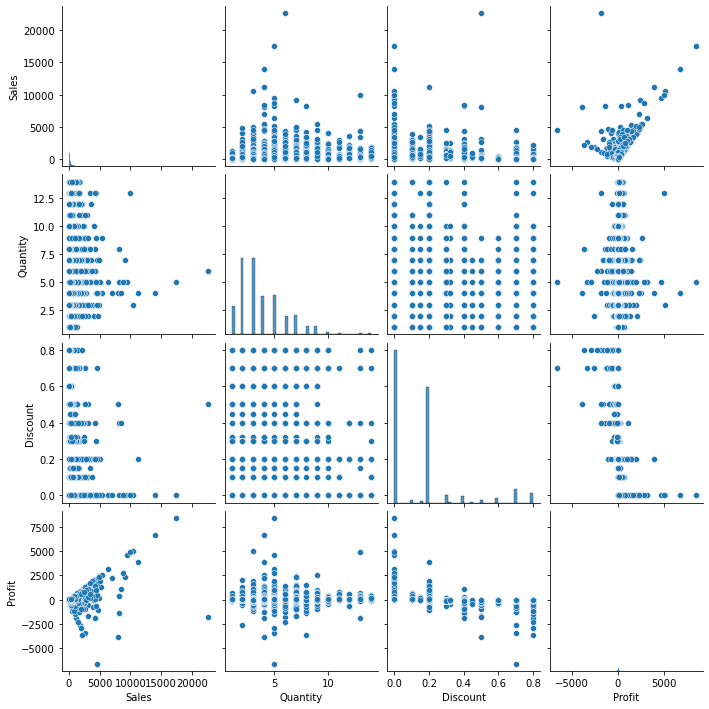

In [15]:
sns.pairplot(data)

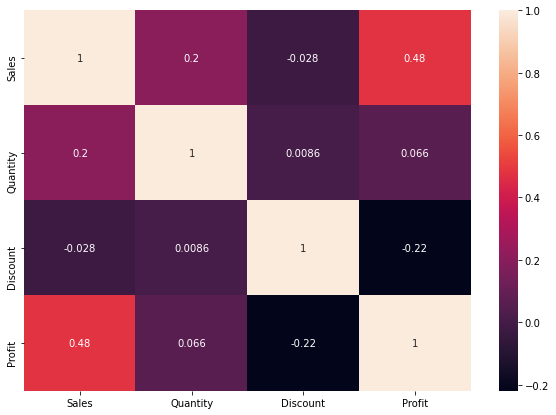

In [16]:
data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

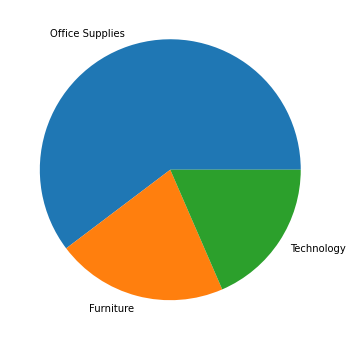

In [17]:
plt.figure(figsize=(6,6))
plt.pie(data['Category'].value_counts(),labels = data['Category'].value_counts().index)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x432 with 0 Axes>

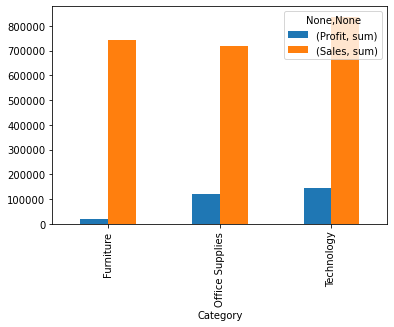

In [19]:
plt.figure(figsize=(10,6))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

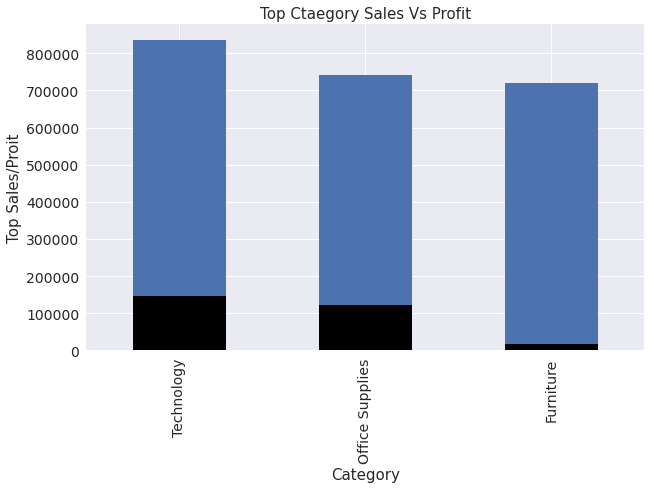

In [20]:
top_category_s = data.groupby("Category").Sales.sum().nlargest(n=100)
top_category_p = data.groupby('Category').Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_category_s.plot(kind='bar',figsize=(10,6),fontsize=14)
top_category_p.plot(kind='bar',figsize=(10,6),fontsize=14,color='black')
plt.xlabel('Category',fontsize=15)
plt.ylabel('Top Sales/Proit',fontsize=15)
plt.title('Top Ctaegory Sales Vs Profit',fontsize=15)
plt.show()

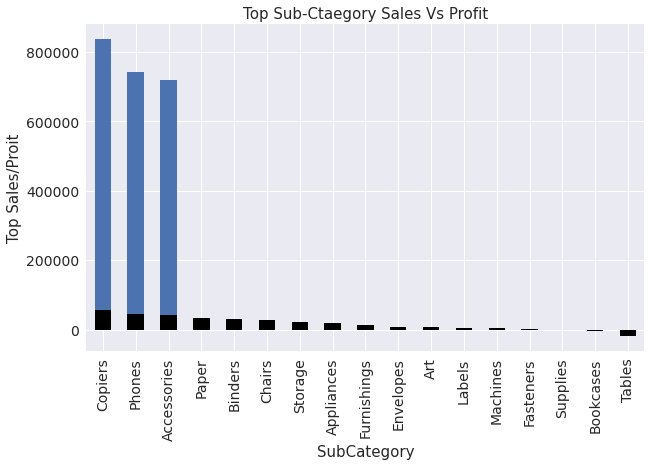

In [21]:
top_subcategory_s = data.groupby("Sub-Category").Sales.sum().nlargest(n=100)
top_category_p = data.groupby('Sub-Category').Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_category_s.plot(kind='bar',figsize=(10,6),fontsize=14)
top_category_p.plot(kind='bar',figsize=(10,6),fontsize=14,color='black')
plt.xlabel('SubCategory',fontsize=15)
plt.ylabel('Top Sales/Proit',fontsize=15)
plt.title('Top Sub-Ctaegory Sales Vs Profit',fontsize=15)
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

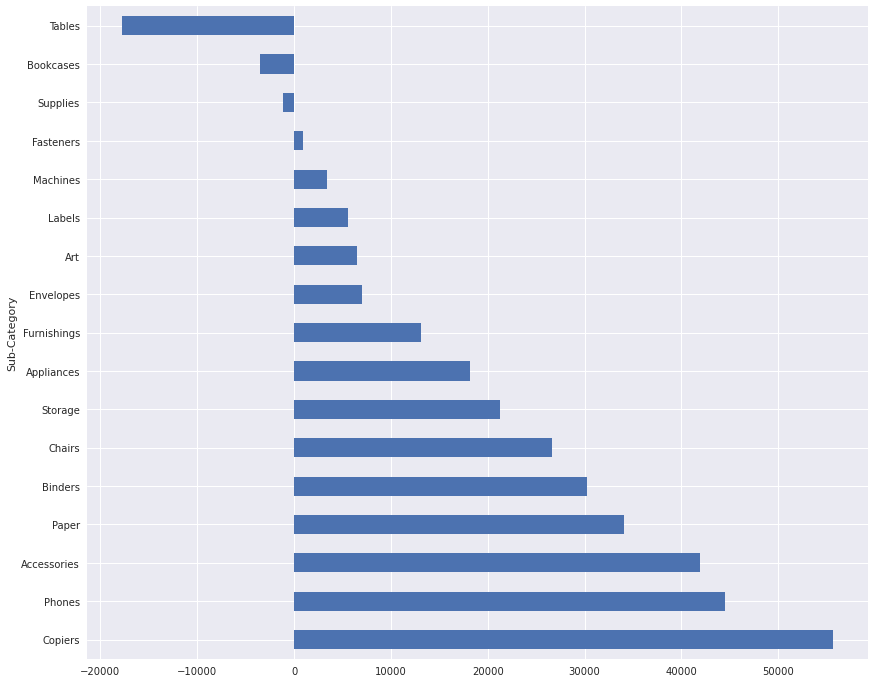

In [23]:
plt.figure(figsize=(14,12))
statewise = data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

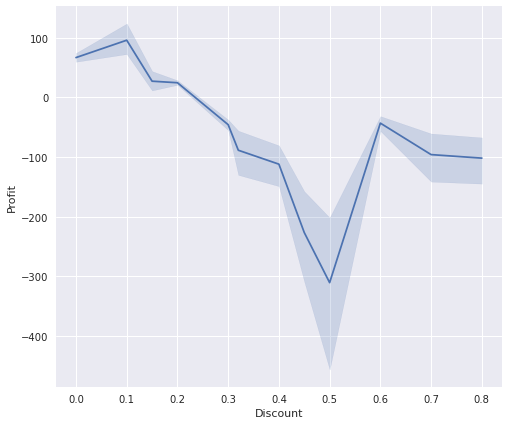

In [28]:
plt.figure(figsize=(8,7))
sns.lineplot(data['Discount'],data['Profit'],data=data)

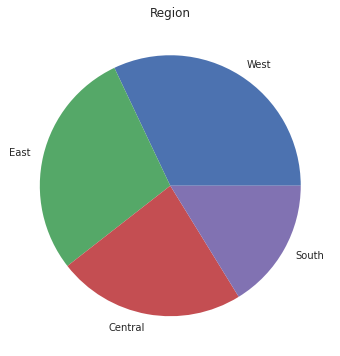

In [26]:
plt.figure(figsize= (6,6))
plt.title('Region')
plt.pie(data['Region'].value_counts(),labels=data['Region'].value_counts().index)
plt.show()

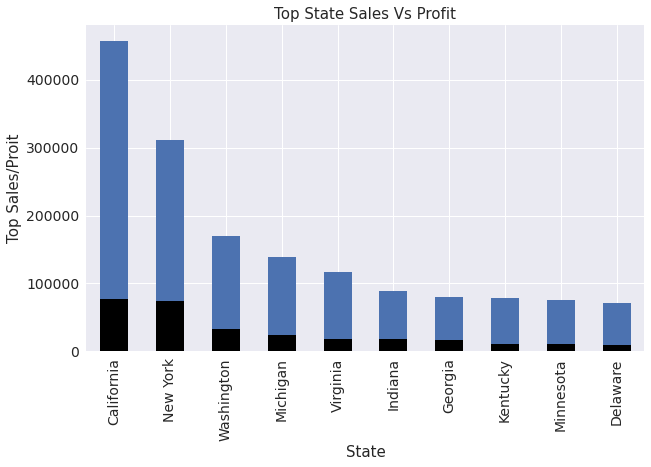

In [30]:
top_states_s = data.groupby("State").Sales.sum().nlargest(n=10)
top_states_p = data.groupby('State').Profit.sum().nlargest(n=10)
plt.style.use('seaborn')
top_states_s.plot(kind='bar',figsize=(10,6),fontsize=14)
top_states_p.plot(kind='bar',figsize=(10,6),fontsize=14,color='black')
plt.xlabel('State',fontsize=15)
plt.ylabel('Top Sales/Proit',fontsize=15)
plt.title('Top State Sales Vs Profit',fontsize=15)
plt.show()

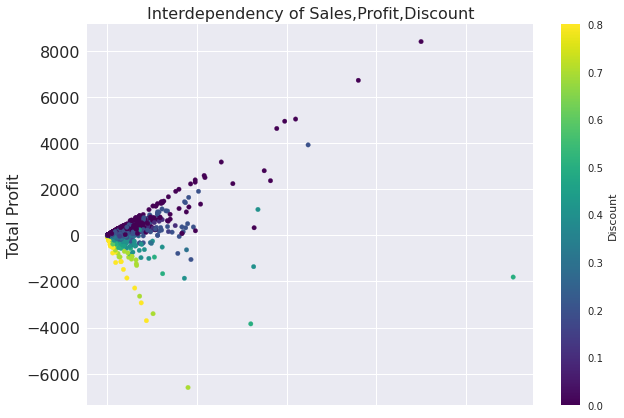

In [31]:
plt.style.use('seaborn')
data.plot(kind='scatter',figsize=(10,7),x='Sales',y='Profit',c='Discount',s=20,fontsize=16,colormap='viridis')
plt.ylabel('Total Profit',fontsize=16)
plt.title('Interdependency of Sales,Profit,Discount',fontsize=16)
plt.show()

### Conclusion:
 #### 1. We should limit sales of furniture and increase that of technology and office Suppliers of furniture has very less profit compare than sales
 #### 2. Considering sub-categories sales of tables should be minimized.
 #### 3.Increase sales in east as profit is more
 #### 4.We should concentrate on states like 'New York ' and 'California' to make more profit.